### Importing Libraries

In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [11]:
weather_data=pd.read_csv('seattle-weather.csv')

In [12]:
weather_data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [13]:
weather_data.shape

(1461, 6)

In [14]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [19]:
weather_data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [22]:
weather_data.duplicated().sum()

0

In [39]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<AxesSubplot:>

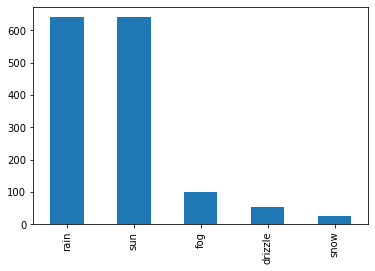

In [25]:
weather_data['weather'].value_counts().plot(kind='bar')

In [38]:
countRain=len(weather_data[weather_data['weather']=='rain'])
countsun=len(weather_data[weather_data['weather']=='sun'])
countFog=len(weather_data[weather_data['weather']=='fog'])
countDizzle=len(weather_data[weather_data['weather']=='drizzle'])
countSnow=len(weather_data[weather_data['weather']=='snow'])

print('Percentage of Rain: {:2f}%'.format((countRain/len(weather_data.weather))*100))
print('Percentage of Sun: {:2f}%'.format((countsun/len(weather_data.weather))*100))
print('Percentage of Fog: {:2f}%'.format((countFog/len(weather_data.weather))*100))
print('Percentage of Dizzle: {:2f}%'.format((countDizzle/len(weather_data.weather))*100))
print('Percentage of Snow: {:2f}%'.format((countSnow/len(weather_data.weather))*100))

Percentage of Rain: 43.874059%
Percentage of Sun: 43.805613%
Percentage of Fog: 6.913073%
Percentage of Dizzle: 3.627652%
Percentage of Snow: 1.779603%


### Distribution of Numerical Variables

<AxesSubplot:xlabel='precipitation', ylabel='Density'>

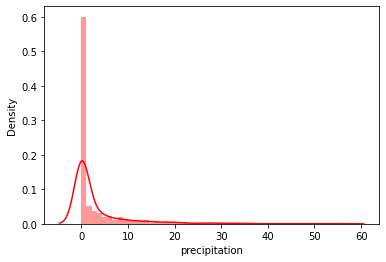

In [43]:
sns.distplot(weather_data['precipitation'], color='red')

<AxesSubplot:xlabel='temp_max', ylabel='Density'>

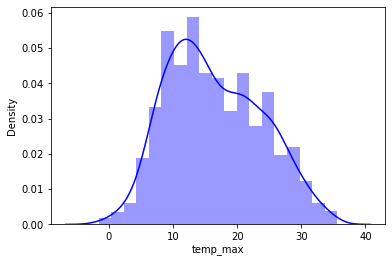

In [47]:
sns.distplot(weather_data['temp_max'], color='blue')

<AxesSubplot:xlabel='temp_min', ylabel='Density'>

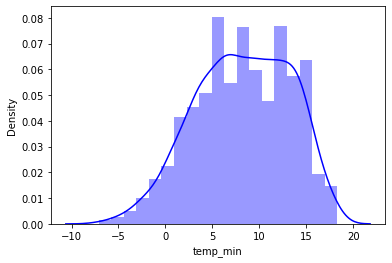

In [48]:
sns.distplot(weather_data['temp_min'], color='blue')

<AxesSubplot:xlabel='wind', ylabel='Density'>

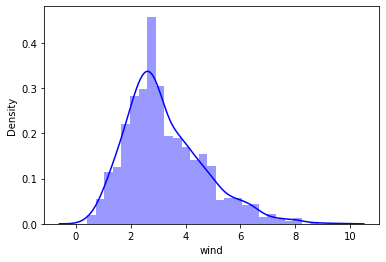

In [49]:
sns.distplot(weather_data['wind'], color='blue')

From the above distribution it is clear that precipititation and Wind are positively skewed and tem_min is negetively skewed, and both has some outlier

### Outliers in Data

<AxesSubplot:xlabel='wind'>

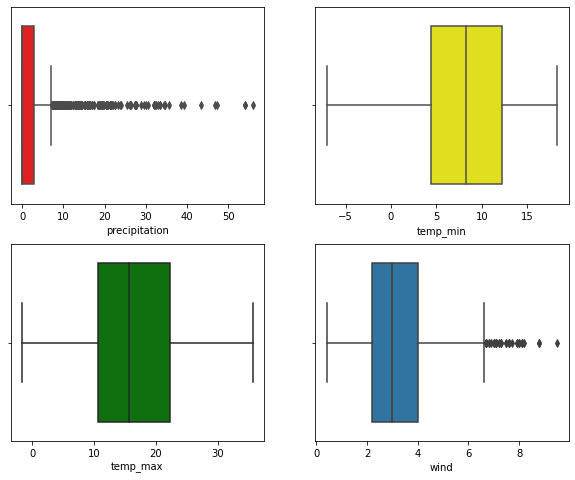

In [72]:
fig, axs=plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x='precipitation',data=weather_data, ax=axs[0,0], color='red')
sns.boxplot(x='temp_min',data=weather_data, ax=axs[0,1], color='yellow')
sns.boxplot(x='temp_max',data=weather_data, ax=axs[1,0], color='green')
sns.boxplot(x='wind',data=weather_data, ax=axs[1,1])

### Exploratory Data Analysis

<AxesSubplot:xlabel='weather', ylabel='wind'>

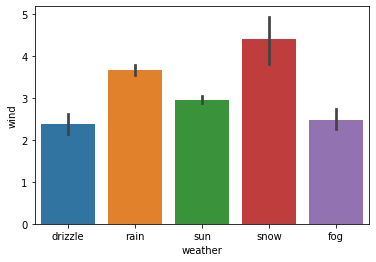

In [76]:
sns.barplot(x='weather', y='wind',data=weather_data)

<AxesSubplot:xlabel='weather', ylabel='temp_min'>

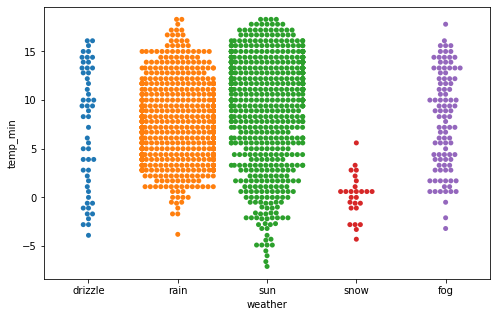

In [82]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='weather', y='temp_min',data=weather_data)

<AxesSubplot:xlabel='weather', ylabel='temp_max'>

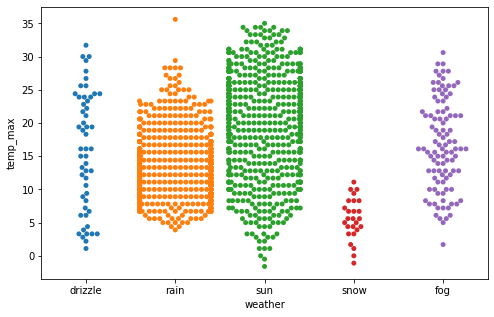

In [83]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='weather', y='temp_max',data=weather_data)

<AxesSubplot:xlabel='weather', ylabel='precipitation'>

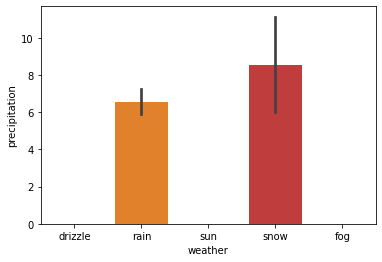

In [88]:
sns.barplot(x='weather', y='precipitation',data=weather_data)

In [89]:
weather_data=weather_data.drop(columns='date')

In [90]:
weather_data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


### Label Encoding

In [94]:
le=LabelEncoder()
weather_data['weather']=le.fit_transform(weather_data['weather'])

In [95]:
weather_data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


<AxesSubplot:>

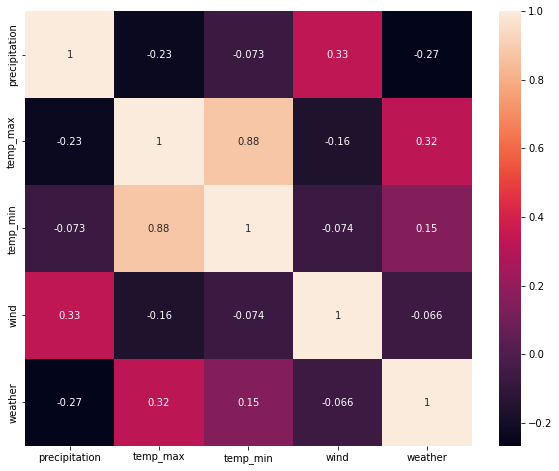

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(weather_data.corr(), annot=True)

In [102]:
X=weather_data.drop(columns=['weather'])

In [103]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [104]:
y=weather_data['weather']

In [105]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2)

### ALGORITHMS AND MODEL TRAINING:

### KNN Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('Accuracy of KKN: ', knn.score(X_test, y_test))
print(classification_report(y_pred, y_test))

Accuracy of KKN:  0.7952218430034129
              precision    recall  f1-score   support

           0       0.12      0.25      0.17         4
           1       0.22      0.25      0.24        16
           2       0.87      0.87      0.87       126
           3       0.00      0.00      0.00         0
           4       0.86      0.81      0.83       147

    accuracy                           0.80       293
   macro avg       0.42      0.43      0.42       293
weighted avg       0.82      0.80      0.81       293



### SUPPORT VECTOR MACHINE

In [118]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('Accuracy of SVM: ', knn.score(X_test, y_test))
print(classification_report(y_pred, y_test))

Accuracy of SVM:  0.7952218430034129
              precision    recall  f1-score   support

           0       0.12      0.25      0.17         4
           1       0.22      0.25      0.24        16
           2       0.87      0.87      0.87       126
           3       0.00      0.00      0.00         0
           4       0.86      0.81      0.83       147

    accuracy                           0.80       293
   macro avg       0.42      0.43      0.42       293
weighted avg       0.82      0.80      0.81       293



### XGBOOST

In [122]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print('Accuracy of SVM: ', xgb.score(X_test, y_test))
print(classification_report(y_pred, y_test))

Accuracy of SVM:  0.8361774744027304
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.11      0.29      0.16         7
           2       0.94      0.91      0.93       129
           3       0.00      0.00      0.00         2
           4       0.90      0.83      0.87       150

    accuracy                           0.84       293
   macro avg       0.39      0.41      0.39       293
weighted avg       0.88      0.84      0.86       293



In [128]:
input_data=[[1.140175,8.9,2.8,2.469818]]
prediction=knn.predict(input_data)

In [132]:
print("The weather is:")
if(prediction==0):
    print("Drizzle")
elif(prediction==1):
    print("Fog")
elif(prediction==2):
    print("Rain")
elif(prediction==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain


In [134]:
import pickle
pickle.dump(knn, open('knn.pkl','wb'))

In [137]:
knn=pickle.load(open('knn.pkl','rb'))

In [138]:
knn.predict([[1.140175,8.9,2.8,2.469818]])

array([2])